<center><span style="font-size:50px"> INFORMATION-THEORY & HYPERSCANNING TUTORIAL</span></center>

***
***

Efficiently calculate mutual information (MI), transfer entropy (TE), and causal emergence for hyperscanning data using Lizier's (2014, doi:10.3389/frobt.2014.00011) JIDT toolkit and other methods, specified where appropriate.

 
Information-theoretic measures are non-parametric by design and are thus sensitive to nonlinear dynamics. Standard connectivity measures including PLV, (w)PLI, CCorr, etc. are parametric measures.

***
<br> 
<b><span style="font-size:20px">Shannon Entropy</span></b>

This is the expected value of Shannon information content and can be understood as a general measure of "surprise" or "unpredictability" of a variable $X$. Respectively, for discrete data/estimators (e.g., binning, symbolic), Shannon entropy is given by 

$$H(X) = -\sum_{x \in \mathcal{X}}p_X(x)\log_2p_X(x)$$

and for continuous data/estimators (box kernel, kNN, Gaussian), Shannon or "differential" entropy is given by

$$H(X) = -\int_{\mathcal{X}}p_X(x)\log_2p_X(x)$$

<br> <br> <br>
<b><span style="font-size:20px">Mutual Information</span></b>

The 3H estimator is often used to calculate mutual information.
\begin{align} \notag
I(X;Y) &\equiv H(X) + H(Y) - H(X,Y) \\ \notag
&\equiv H(X) - H(X|Y) \\ \notag
&\equiv H(Y) - H(Y|X) \\ \notag
&\equiv H(X,Y) - H(X|Y) - H(Y|X) \notag
\end{align}

Mutual information can also be understood as measuring the divergence between the joint probability of two variables and the product of their marginal distributions (aka Kullback-Liebler Divergence: $D_{\text{KL}}(P_{XY} \,||\, P_{X} \otimes P_{Y})$). In this way, mutual information can be determined in the following way

$$ I(X;Y) = \sum_{x \in \mathcal{X}}\sum_{y \in \mathcal{Y}}p_{XY}(x,y)\log_2\left(\frac{p_{XY}(x,y)}{p_X(x)p_Y(y)}\right) $$
$$ I(X;Y) = \int_{\mathcal{X}}\int_{\mathcal{Y}}p_{XY}(x,y)\log_2\left(\frac{p_{XY}(x,y)}{p_X(x)p_Y(y)}\right) $$


<br> <br> <br>
<b><span style="font-size:20px">Transfer Entropy</span></b>

The transfer entropy (TE) between a source variable $Y$ on a target variable(s) $X$ can be interpreted as the predictive ability of $\bm{Y}_{t-1} := (Y_{t-1}, Y_{t-2}, \ldots, Y_{t-l})$ (i.e., the past states of $\bm{Y}$ until embedding history length $l$) on $X_t$ (i.e., the current state of $\bm{X}$), over and above $\bm{X}_{t-1}$ (i.e., $\bm{X}$'s own past states). In other words, TE quantifies how much the future state of $\bm{X}$ can be predicted by knowing the past and present states of another system $\bm{Y}$, beyond what is predictable from the past of the target system $\bm{X}$ alone. Simpler still, it addresses the question "how well/much better does $\bm{Y}$ know $\bm{X}$, more than it knows itself?" 
TE is a dynamic and directional ($\therefore$ asymmetric) measure of information transfer between two variables. However, and critically, since this measure is not conditioned on any other potentially causal variables but just a pairwise statistical measure, TE should not be (at least strictly) interpreted as quantifying causality per se. Instead, this pairwise approach should be understood as \textbf{apparent transfer entropy} (Lizier, 2014). In any case, so-called apparent TE is given by

\begin{align} \notag
    TE_{Y\rightarrow X}^{(k,l,u,\tau)} &= I(\bm{Y}_{t-u}^{(l,\tau_Y)}; X_t | \bm{X}_{t-1}^{(k,\tau_X)}) \\ \notag
    &= \sum_{\substack{x_t, \, \bm{x}_{t-1}^{(k,\tau_X)} \in \mathcal{X}, \\ \bm{y}_{t-u}^{(l,\tau_Y)} \in \mathcal{Y}}} p\left(x_t, \bm{x}_{t-1}^{(k,\tau_X)}, \bm{y}_{t-u}^{(l,\tau_Y)}\right) \log_2 \left( \frac{p\left(\bm{y}_{t-u}^{(l,\tau_Y)}, x_t | \bm{x}_{t-1}^{(k,\tau_X)}\right)}{p\left(x_t | \bm{x}_{t-1}^{(k,\tau_X)}\right)} \right)
\end{align}

with parameters including embedding history length for source ($l$) and target ($k$), embedding delay for source ($\tau_Y$) and target ($\tau_X$), and some causal delay or interaction lag $u$. Respectively, the embedded target and source states can be given as $\bm{x}_{t-1}^{(k,\tau_X)} = \{ x_{t-(k-1)\tau_X}, \ldots, x_{t-\tau_X}, x_{t-1} \}$ and embedded source state $\bm{y}_{t-1}^{(l,u,\tau_Y)} = \{ y_{t-u-(l-1)\tau_Y}, \ldots, y_{t-u-\tau_Y}, y_{t-u} \}$, here with the additional parameter of causal delay offsetting all realisations by some time step $u$. (For concision, probability spaces are omitted from the equation.)

<br> <br> <br>
<b><span style="font-size:20px">Conditional Transfer Entropy</span></b>

However, other variables may mediate the observed pairwise transfer entropy due to common interactions. It follows, then, that one ought to condition these other drivers. Here, we can calculate the \textit{complete} (Lizier, 2014) or \textit{partial} (Faes et al., 2016) transfer entropy (Lizier et al., 2008; Lizier 2014; Montalto et al., 2014; Faes et al., 2016). 

\begin{align} \notag
    T_{Y\rightarrow X|Z}^{(k,l,m,u,\tau)} &= I\left(\bm{Y}_{t-u}^{(l,\tau_Y)}; X_{t} | \bm{X}_{t-1}^{(k,\tau_X)}, \bm{Z}_{t-u}^{(m, \tau_Z)}\right) \\ \notag
    &= H\left(X_t | \bm{X}_{t-1}^{(k,\tau_X)}, \bm{Z}_{t-u}^{(m, \tau_Z)}\right) - H\left(X_t | \bm{X}_{t-1}^{(k,\tau_X)}, \bm{Y}_{t-u}^{(l,\tau_Y)}, \bm{Z}_{t-u}^{(m, \tau_Z)}\right) \\ \notag
    &= \sum_{\substack{x_{t}, \, \bm{x}_{t-1}^{(k,\tau_X)} \in \mathcal{X}, \\ \bm{y}_{t-u}^{(l,\tau_Y)} \in \mathcal{Y}, \\ \bm{z}_{t-u}^{(m,\tau_Z)} \in \mathcal{Z}}} p\left(x_{t}, \bm{x}_{t-1}^{(k,\tau_X)}, \bm{y}_{t-u}^{(l,\tau_Y)}, \bm{z}_{t-u}^{(m,\tau_Z)}\right) \log_2 \left(\frac{p\left(x_{t} | \bm{x}_{t-1}^{(k,\tau_X)}, \bm{y}_{t-u}^{(l,\tau_Y)}, \bm{z}_{t-u}^{(m,\tau_Z)}\right)}{p\left(x_{t} | \bm{x}_{t-1}^{(k,\tau_X)}, \bm{z}_{t-u}^{(m,\tau_Z)}\right)} \right) \\ \notag
\end{align} 
with embedding history length $m$ and embedding delay $\tau_Z$ for the conditioning variable $Z$.

This can be extended to condition on all $N$ other potentially causal variables/channels in multivariate set of vectors $\bm{\mathscr{Z}} := \{\bm{Z}_1, \bm{Z}_2, \ldots, \bm{Z}_N\}$ and each $\bm{Z}_i := \bm{Z}_{i, \, t-u}^{(m, \tau_Z)}$. In other words, $\bm{\mathscr{Z}}$ is the set of all variables (channels) that are not variables $\bm{X}$ or $\bm{Y}$. Thus, the complete transfer entropy can be given thus

\begin{align} \notag
    TE_{Y \rightarrow X | \bm{\mathscr{Z}}}^{(k,l,m,u,\tau)} &= I\left(\bm{Y}_{t-u}^{(l,\tau_Y)}; X_{t} | \bm{X}_{t-1}^{(k,\tau_X)}, \mathscr{Z}_{t-u}^{(m,\tau_Z)}\right) \\ \notag
    &= H\left(X_t | \bm{X}_{t-1}^{(k,\tau_X)}, \bm{\mathscr{Z}}_{t-u}^{(m, \tau_Z)}\right) - H\left(X_t | \bm{X}_{t-1}^{(k,\tau_X)}, \bm{Y}_{t-u}^{(l,\tau_Y)}, \bm{\mathscr{Z}}_{t-u}^{(m, \tau_Z)}\right) \\ \notag
\end{align}

This measure will identify the pure ``causal" component of variable/channel $Y$ on $X$, given every other known variable/channel  in the system (i.e., in the set $\mathscr{Z}$).

***
***
<center><span style="font-size:40px">ESTIMATORS</span></center>

***
***
<br> 
<b><span style="font-size:20px">1. Binning/Histogram Estimator</span></b>

Discretising time series into equal-width bins and measuring marginal and joint probability distributions as the frequency of occurences in each bin, s.t.

$$p(X=x_i) = \frac{n_i}{N}$$

where $x_i$ is the value of the $i$-th observation (or time point) and $N$ is the total number of observations.
<br>

***
<br>
<b><span style="font-size:20px">2. Kraskov–Stögbauer–Grassberger Estimators</span></b>

Using k-nearest neighbour structure:


$$ \hat{I}^{(1)}(X;Y) = \psi(k) - \frac{1}{N} \sum_{i=1}^{N} [\psi(n_x(i) + 1) + \psi(n_y(i) + 1)] + \psi(N) $$

$$ \hat{I}^{(2)}(X;Y) = \psi(k) - \frac{1}{k} - \frac{1}{N} \sum_{i=1}^{N} [\psi(n_x(i)) + \psi(n_y(i))] + \psi(N)$$


where $\psi$ is the digamma function, $k$ is the number of nearest neighbours considered, $N$ is the total number of samples, $n_x(i)$ is the number of points within $\epsilon_i$ distance in the $X$-space for the $i$-th point, and $n_y(i)$ is the number of points within $\epsilon_i$ distance in the $Y$-space for the $i$-th point.

<br>

***
<br> 
<b><span style="font-size:20px">3. Box Kernel Estimator</span></b>

Based on a (non-parametric) kernel density estimate.

$$ \hat{f}_h(x) = \frac{1}{nh} \sum_{i=1}^{n} K\left(\frac{x - x_i}{h}\right)$$
$$
  K(u) = 
  \begin{cases} 
    \frac{1}{2} & \text{if } |u| \leq 1 \\
    0 & \text{otherwise}
  \end{cases}
$$

where $n$ is the the sample size, $h$ is the bandwidth parameter (controlling the smoothness of the resulting density estimate), and $K$ is the (box) kernel function. 



<br>

***
<br> 
<b><span style="font-size:20px">4. Gaussian Estimator</span></b>

Assumes Gaussianity of probability distributions, namely $X,Y \sim \mathcal{N}(\mu, \sigma^2)$, and therefore gives closed-form expressions for the following entropic measures.

$$ \hat{H}(X) = \frac{1}{2} \ln \left(2\pi e \sigma_X^2\right) $$

$$ \hat{I}(X;Y) = \frac{1}{2} \ln \left( \frac{\sigma_X^2 \sigma_Y^2}{\sigma_X^2\sigma_Y^2 - \sigma_{XY}^2}\right) $$



<br> For transfer entropy, given Gaussianity, it is equivalent to Granger causality or ``Granger prediction" (Cohen, 2014). Therefore, we can express two variables as (linear) vector autoregressive models in the following way

$$ Y_t = \sum_{i=1}^{p} a_i Y_{t-i} + \sum_{i=1}^{p} b_i X_{t-i} + \epsilon_t $$
<br>

***
<br>
<b><span style="font-size:20px">5. Symbolic Estimator</span></b>

NOTE: JIDT does not offer a Symbolic MI calculator, only TE. We have adapted code for symbolic MI from Tyson Pond.

***
***

In [2]:
# CORE
import io
from collections import OrderedDict
import requests

# DATA SCIENCE
import numpy as np
from scipy.stats import mode 

# HYPYP
from hypyp import prep 

# VISUALISATION
import matplotlib.pyplot as plt

# MNE
import mne

## INFO-THEORY MEASURES
from it import *

Reading File-like ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
260 matching events found
No baseline correction applied
0 projection items activated
Reading File-like ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
36 matching events found
No baseline correction applied
0 projection items activated
Dropped 224 epochs: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 56, 57, 58, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 100, 101, 104, 105, 106, 107, 108, 109, 110, 111, 113, 114, 116, 117, 118, 119, 120, 121, 122, 125, 126, 127, 128, 130, 131, 13

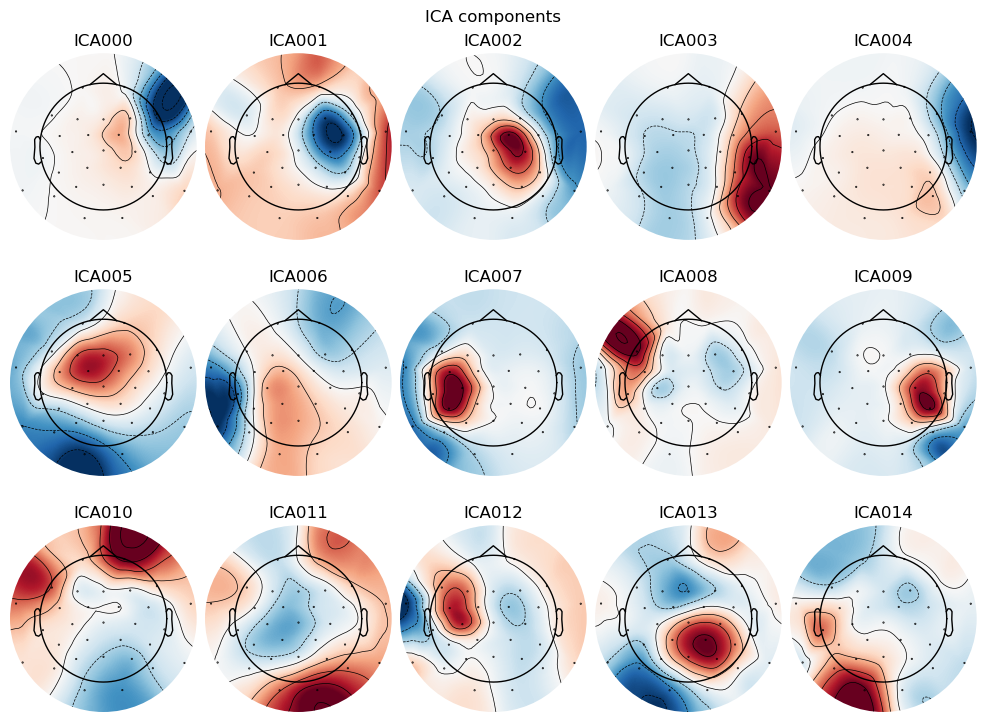

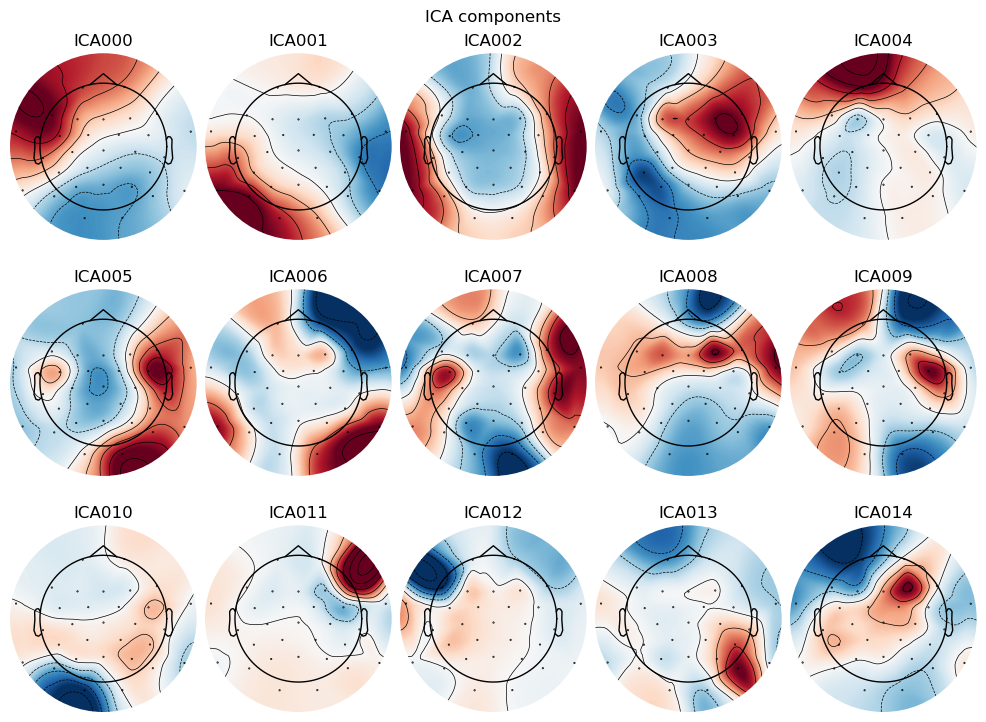

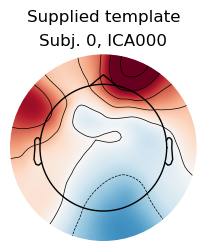

Median correlation with constructed map: 1.000
Displaying selected ICs per subject.
No maps selected for subject [1], consider a more liberal threshold.


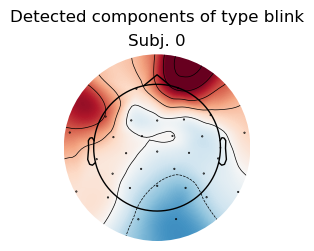

[{'blink': [10]}, {'blink': []}]
Applying ICA to Epochs instance
    Transforming to ICA space (15 components)
    Zeroing out 1 ICA component
    Projecting back using 31 PCA components
Applying ICA to Epochs instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 31 PCA components
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/36 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/36 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/36 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/36 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.30 and n_interpolate=4
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/36 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/36 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/36 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/36 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.20 and n_interpolate=1
Dropped 10 epochs: 0, 1, 3, 4, 5, 6, 8, 9, 13, 20


  0%|          | Repairing epochs : 0/26 [00:00<?,       ?it/s]

No bad epochs were found for your data. Returning a copy of the data you wanted to clean. Interpolation may have been done.
Dropped 10 epochs: 0, 1, 3, 4, 5, 6, 8, 9, 13, 20


  0%|          | Repairing epochs : 0/26 [00:00<?,       ?it/s]

No bad epochs were found for your data. Returning a copy of the data you wanted to clean. Interpolation may have been done.
27.77777777777778 percent of bad epochs
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


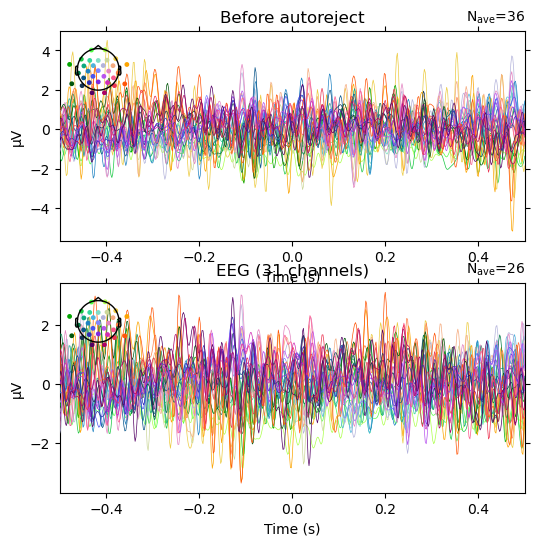

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


<Figure size 640x480 with 0 Axes>

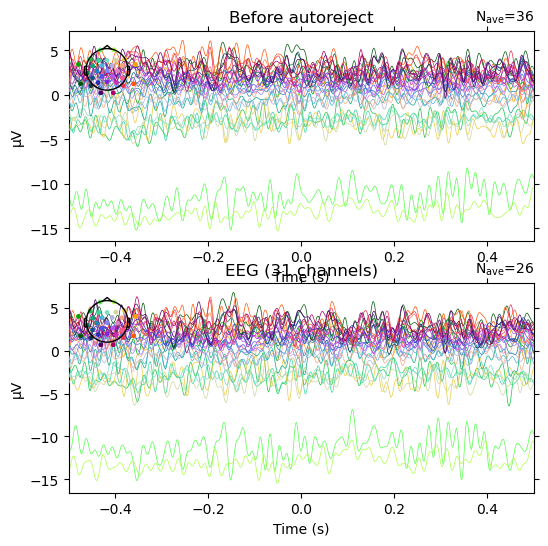

<Figure size 640x480 with 0 Axes>

In [3]:
full_freq = { 'full_frq': [1, 48]}
freq_bands = OrderedDict(full_freq)

URL_TEMPLATE = "https://github.com/ppsp-team/HyPyP/blob/master/data/participant{}-epo.fif?raw=true"

def get_data(idx):
    return io.BytesIO(requests.get(URL_TEMPLATE.format(idx)).content)

epo1 = mne.read_epochs(get_data(1), preload=True) 
epo2 = mne.read_epochs(get_data(2), preload=True)
mne.epochs.equalize_epoch_counts([epo1, epo2])


sampling_rate = epo1.info['sfreq']


icas = prep.ICA_fit([epo1, epo2], n_components=15, method='infomax', fit_params=dict(extended=True), random_state = 42)
cleaned_epochs_ICA = prep.ICA_choice_comp(icas, [epo1, epo2])
cleaned_epochs_AR, _ = prep.AR_local(cleaned_epochs_ICA, strategy="union", threshold=50.0, verbose=True)

preproc_S1, preproc_S2 = cleaned_epochs_AR
data_inter = np.array([preproc_S1, preproc_S2])

# JIDT SETUP

In [4]:
working_directory = os.getcwd() # Make sure your infodynamics.jar file is in this folder, too.

setup_JIDT(working_directory)

In [31]:
def mi_gaussian_test(s1: np.ndarray, s2: np.ndarray, is_epoched: bool) -> float:
    """Calculate mutual information between two time series using Gaussian estimator
    
    Args:
        s1            (np.ndarray): EEG time series 1
        s2            (np.ndarray): EEG time series 2
        is_epoched          (bool): Whether the data is epoched. If True, s1 and s2 take shape (n_epo, n_chan, n_samples); if False, take shape (n_chan, n_samples).

    Returns:
                           (float): Gaussian mutual information between s1 and s2.
    """

    miCalcClass = JPackage("infodynamics.measures.continuous.gaussian").MutualInfoCalculatorMultiVariateGaussian
    miCalc = miCalcClass()

    n_epo = s1.shape[0] if is_epoched else 1

    if is_epoched:
        X, Y = JArray(JDouble, 2)(s1.T), JArray(JDouble, 2)(s2.T) # shape: ([n_samples, n_chan])
    else:
        X, Y = JArray(JDouble, 1)(s1), JArray(JDouble, 1)(s2) # ([n_samples])
    
    miCalc.initialise(n_epo, n_epo)
    miCalc.setObservations(X, Y)
    result = miCalc.computeAverageLocalOfObservations()

    return result

X = data_inter[0][:][5][:] # X.shape = (n_epo, n_samples) 
Y = data_inter[1][:][1][:] 

print(mi_gaussian_test(X, Y, True))

0.0


# 1. MUTUAL INFORMATION

### MI: Binning/Histogram Estimator

  0%|          | 0/31 [00:00<?, ?it/s]

100%|██████████| 31/31 [01:16<00:00,  2.46s/it]


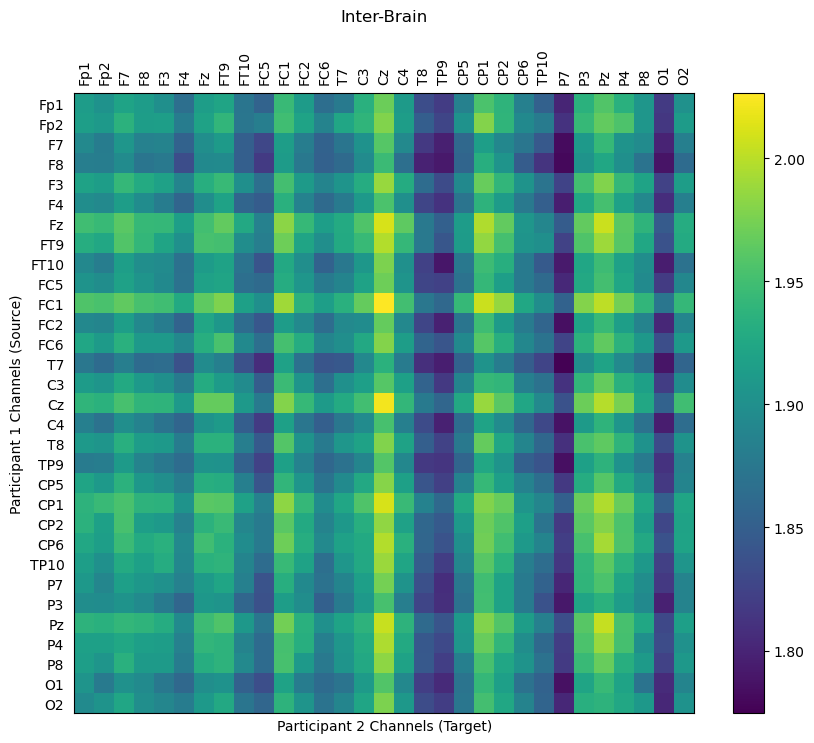

Strongest regions: (Source Channel FC1 -->  Target Channel Cz) = 2.0263801888134143


In [8]:
X = data_inter[0]
Y = data_inter[1]

mi_matrix = compute_mi(
                        X,
                        Y,
                        epoch_avg=False,
                        mode='hist'
                        )


channel_names = np.array((epo1.info['ch_names'], epo2.info['ch_names'])) # or just epo1.info['ch_names'], if intra-brain calculation — will be needed for plotting only 
inter_brain = True

plot_it(mi_matrix, inter_brain, channel_names)

### MI: Kraskov–Stögbauer–Grassberger (KSG) Estimator 1 & 2


In [ ]:
version = 1 # or 2
kraskov_param = 4

X = data_inter[0]
Y = data_inter[1]

mi_matrix = compute_mi(
                        X, 
                        Y, 
                        epoch_avg=False,
                        mode='ksg', 
                        version = version, 
                        kraskov_param = kraskov_param
                        )

channel_names = np.array((epo1.info['ch_names'], epo2.info['ch_names'])) # or just epo1.info['ch_names'], if intra-brain calculation — will be needed for plotting only 
inter_brain = True

plot_it(mi_matrix, inter_brain, channel_names)

### MI: Box Kernel Estimator

  0%|          | 0/31 [00:00<?, ?it/s]

100%|██████████| 31/31 [01:35<00:00,  3.06s/it]


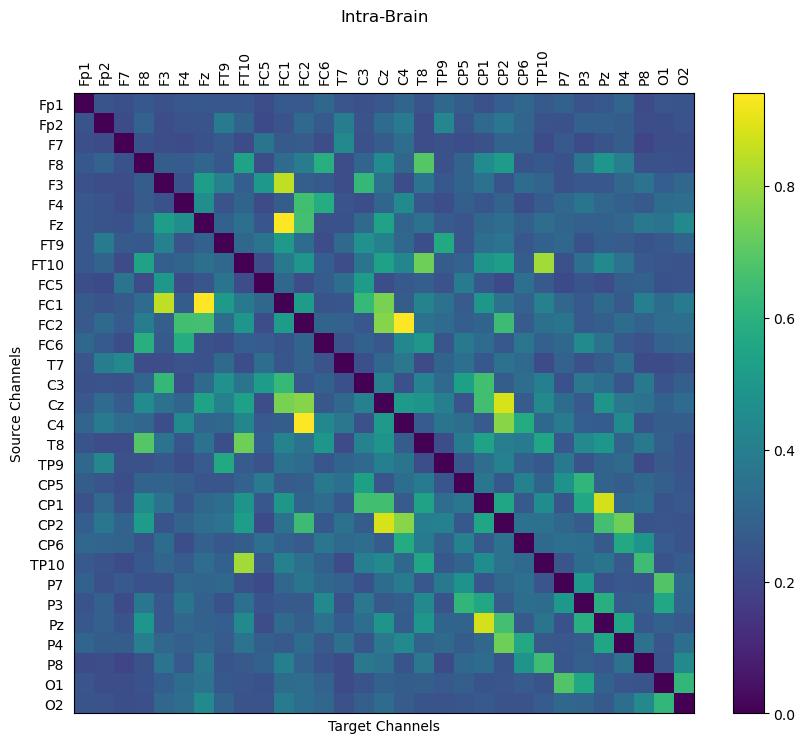

Strongest regions: (Source Channel FC2 -->  Target Channel C4) = 0.940058135027765


In [8]:
kernel_width = 0.25

X = data_inter[0]
Y = data_inter[1]

mi_matrix = compute_mi(
                        X,
                        Y,
                        epoch_avg=False,
                        mode='kernel',
                        kernel_width = kernel_width
                        )

channel_names = np.array((epo1.info['ch_names'], epo2.info['ch_names'])) # or just epo1.info['ch_names'], if intra-brain calculation — will be needed for plotting only 
inter_brain = True

plot_it(mi_matrix, inter_brain, channel_names)

### MI: Gaussian Estimator

In [ ]:
X = data_inter[0]
Y = data_inter[1]

mi_matrix = compute_mi(X, Y, epoch_avg=False, mode='gaussian')


channel_names = np.array((epo1.info['ch_names'], epo2.info['ch_names'])) # or just epo1.info['ch_names'], if intra-brain calculation — will be needed for plotting only 
inter_brain = True

plot_it(mi_matrix, inter_brain, channel_names)

### MI: Symbolic Estimator

In [ ]:
X = data_inter[0]
Y = data_inter[1]

mi_matrix = compute_mi(
                        X,
                        Y,
                        epoch_avg=False,
                        mode='kernel',
                        kernel_width = kernel_width
                        )

channel_names = np.array((epo1.info['ch_names'], epo2.info['ch_names'])) # or just epo1.info['ch_names'], if intra-brain calculation — will be needed for plotting only 
inter_brain = True

plot_it(mi_matrix, inter_brain, channel_names)

# 2. TRANSFER ENTROPY (TE)

### TE: Kraskov–Stögbauer–Grassberger (KSG) Estimator

False


100%|██████████| 31/31 [00:12<00:00,  2.55it/s]


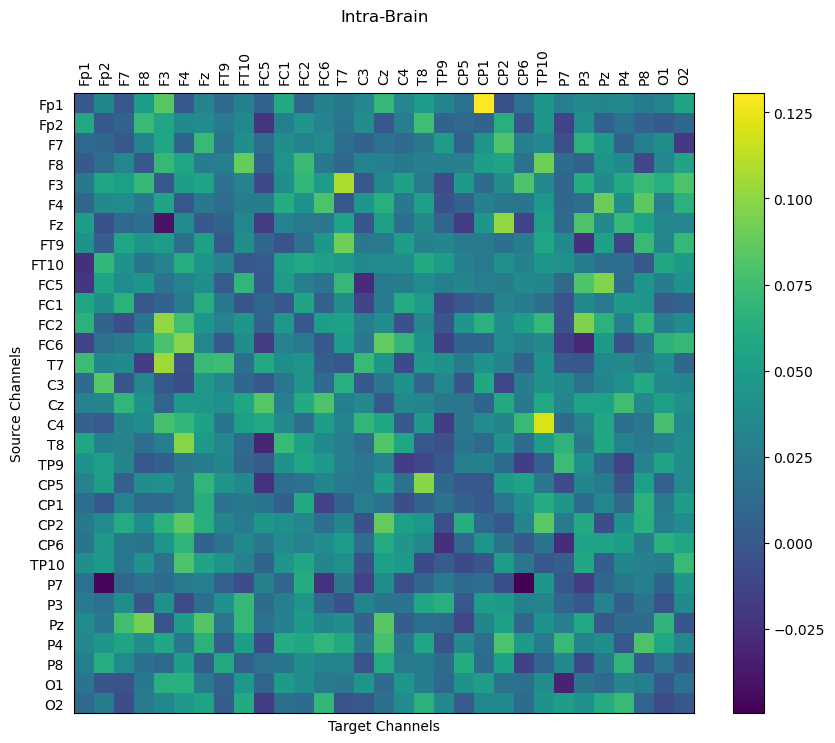

Strongest regions: (Source Channel Fp1 -->  Target Channel CP1) = 0.13048496076537686


In [5]:
X = data_inter[0]
Y = data_inter[1]

te_matrix_xy, te_matrix_yx = compute_te(
                                        X, 
                                        Y,
                                        epoch_avg=True,
                                        mode='ksg',
                                        optimise=False
                                        )

channel_names = np.array((epo1.info['ch_names'], epo2.info['ch_names'])) # or just epo1.info['ch_names'], if intra-brain calculation — will be needed for plotting only 
inter_brain = True

plot_it(te_matrix_xy, inter_brain, channel_names)
plot_it(te_matrix_yx, inter_brain, channel_names)

### TE: Box Kernel Estimator

False


100%|██████████| 31/31 [00:05<00:00,  5.74it/s]


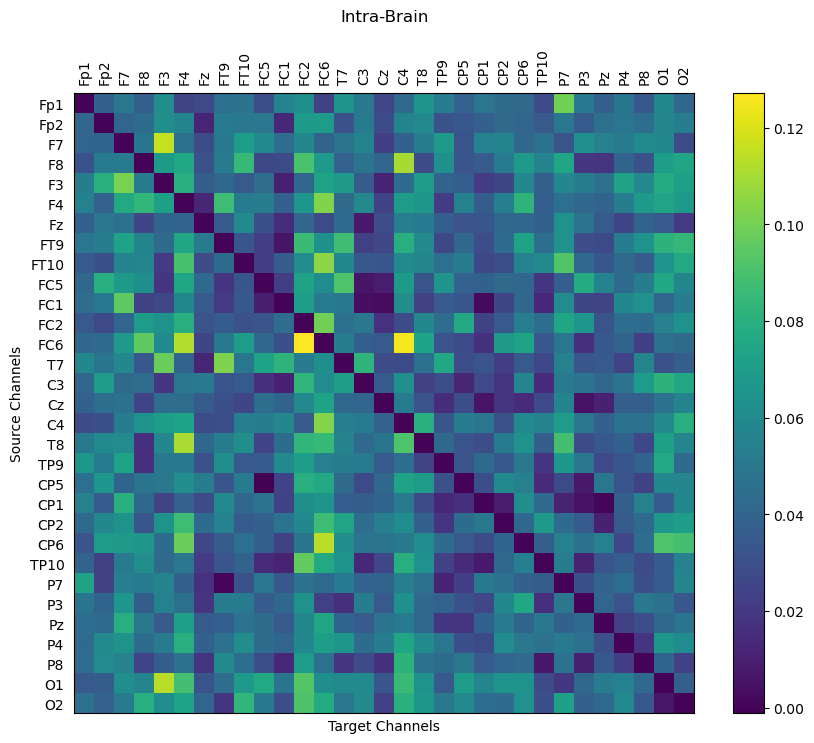

Strongest regions: (Source Channel FC6 -->  Target Channel FC2) = 0.12709568618728628


In [8]:
X = data_inter[0]
Y = data_inter[1]

k = 1 # Destination history embedding length
kernel_width = 0.5

te_matrix_xy, te_matrix_yx = compute_te(
                                        X, 
                                        Y,
                                        epoch_avg=False,
                                        mode='kernel', 
                                        k = k, 
                                        kernel_width = kernel_width
                                        )

channel_names = np.array((epo1.info['ch_names'], epo2.info['ch_names'])) # or just epo1.info['ch_names'], if intra-brain calculation — will be needed for plotting only 
inter_brain = True

plot_it(te_matrix_xy, inter_brain, channel_names)
plot_it(te_matrix_yx, inter_brain, channel_names)


### TE: Gaussian Estimator

  0%|          | 0/31 [00:00<?, ?it/s]

100%|██████████| 31/31 [00:01<00:00, 23.29it/s]


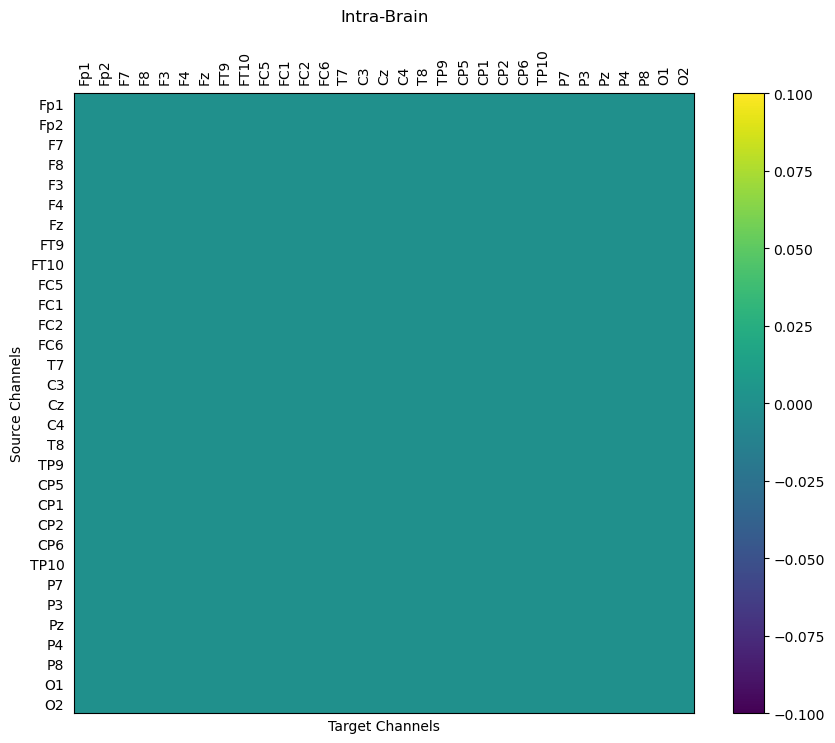

Strongest regions: (Source Channel Fp1 -->  Target Channel Fp1) = 0.0


In [9]:
X = data_inter[0]
Y = data_inter[1]

k = 6
k_tau = 2
l = 2
l_tau = 2
delay = 3
bias_correction = False

te_matrix_xy, te_matrix_yx = compute_te(
                                        X, 
                                        epoch_avg=True,
                                        mode='gaussian', 
                                        k=k, 
                                        k_tau = k_tau,
                                        l=l,
                                        l_tau = l_tau,
                                        delay = delay,
                                        bias_correction = bias_correction
                                        )

channel_names = np.array((epo1.info['ch_names'], epo2.info['ch_names'])) # or just epo1.info['ch_names'], if intra-brain calculation — will be needed for plotting only 
inter_brain = True

plot_it(te_matrix_xy, inter_brain, channel_names)
plot_it(te_matrix_yx, inter_brain, channel_names)

### TE: Symbolic Estimator

100%|██████████| 31/31 [00:17<00:00,  1.79it/s]


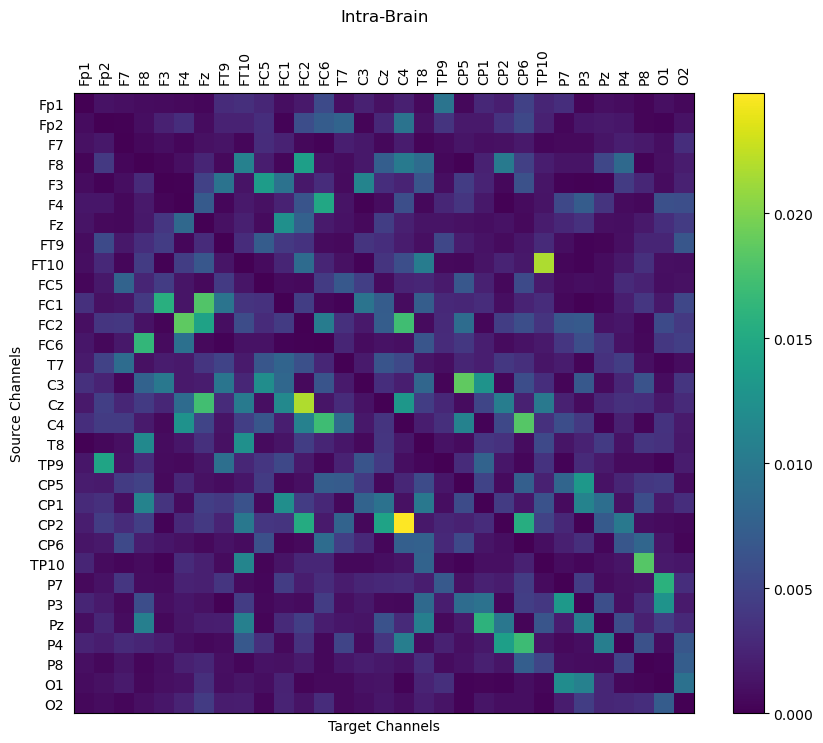

Strongest regions: (Source Channel CP2 -->  Target Channel C4) = 0.024784899065300976


In [7]:
X = data_inter[0]
Y = data_inter[1]

k = 2 # Destination history embedding length

te_matrix_xy, te_matrix_yx = compute_te(
                                        X, 
                                        Y,
                                        epoch_avg=False, 
                                        mode='symbolic', 
                                        k=k
                                        )

channel_names = np.array((epo1.info['ch_names'], epo2.info['ch_names'])) # or just epo1.info['ch_names'], if intra-brain calculation — will be needed for plotting only 
inter_brain = True

plot_it(te_matrix_xy, inter_brain, channel_names)
plot_it(te_matrix_yx, inter_brain, channel_names)


# 3. ACCURACY TESTING

Feeding various fractions of hyperscanning data (10% to 100%) of X seconds, elbow graphs can be calculated to estimate at what fraction of data (and $\therefore$ what recomended number of time samples) is necessary for better estimations.  

100%|██████████| 31/31 [00:18<00:00,  1.66it/s]


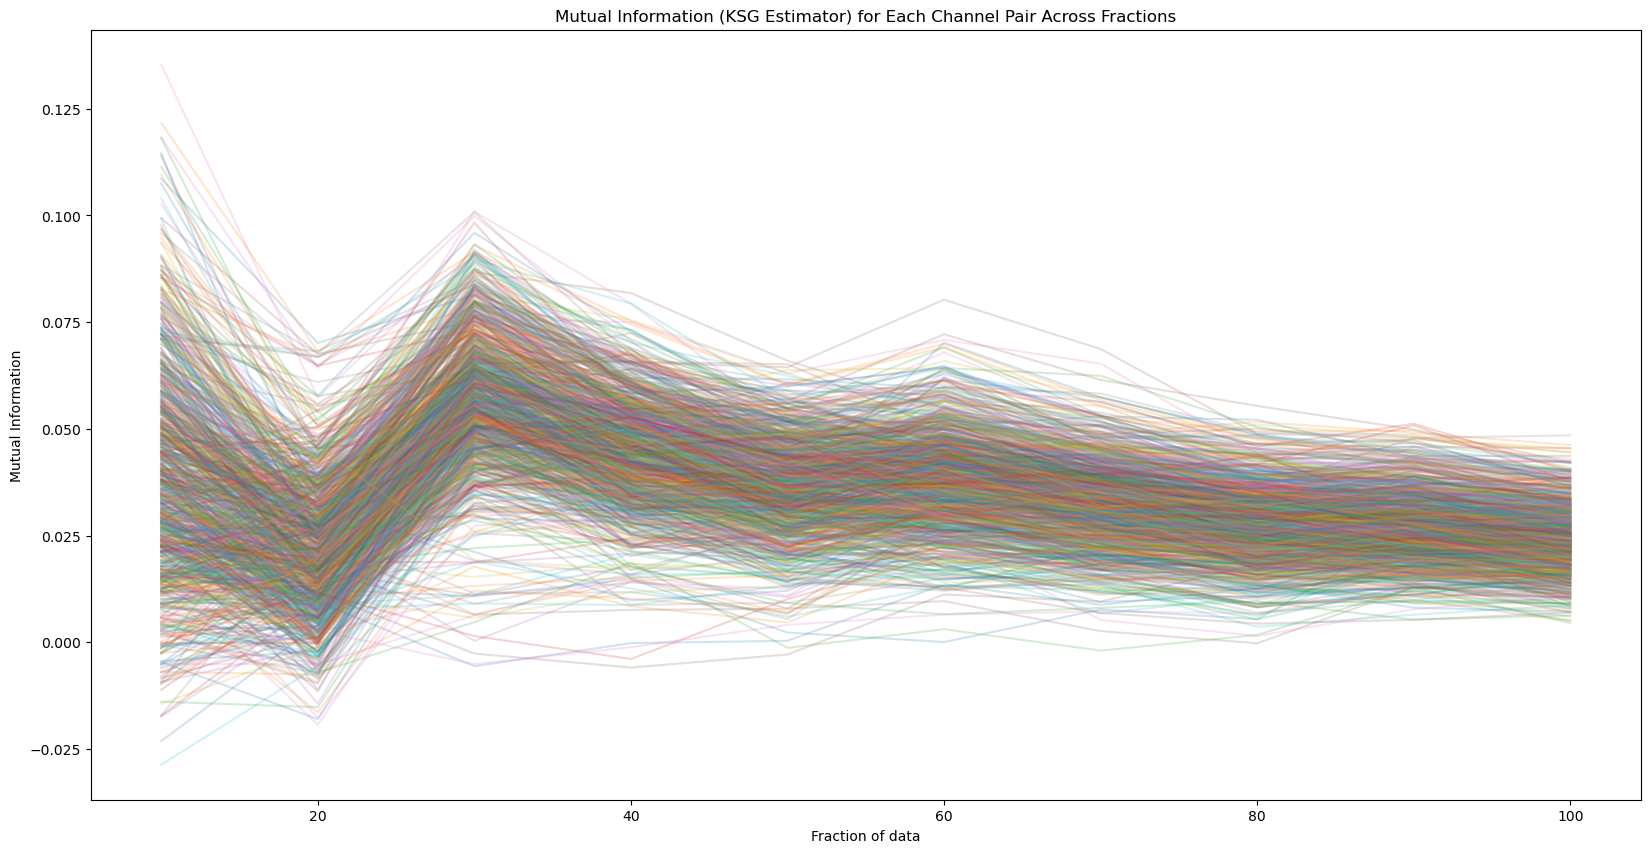

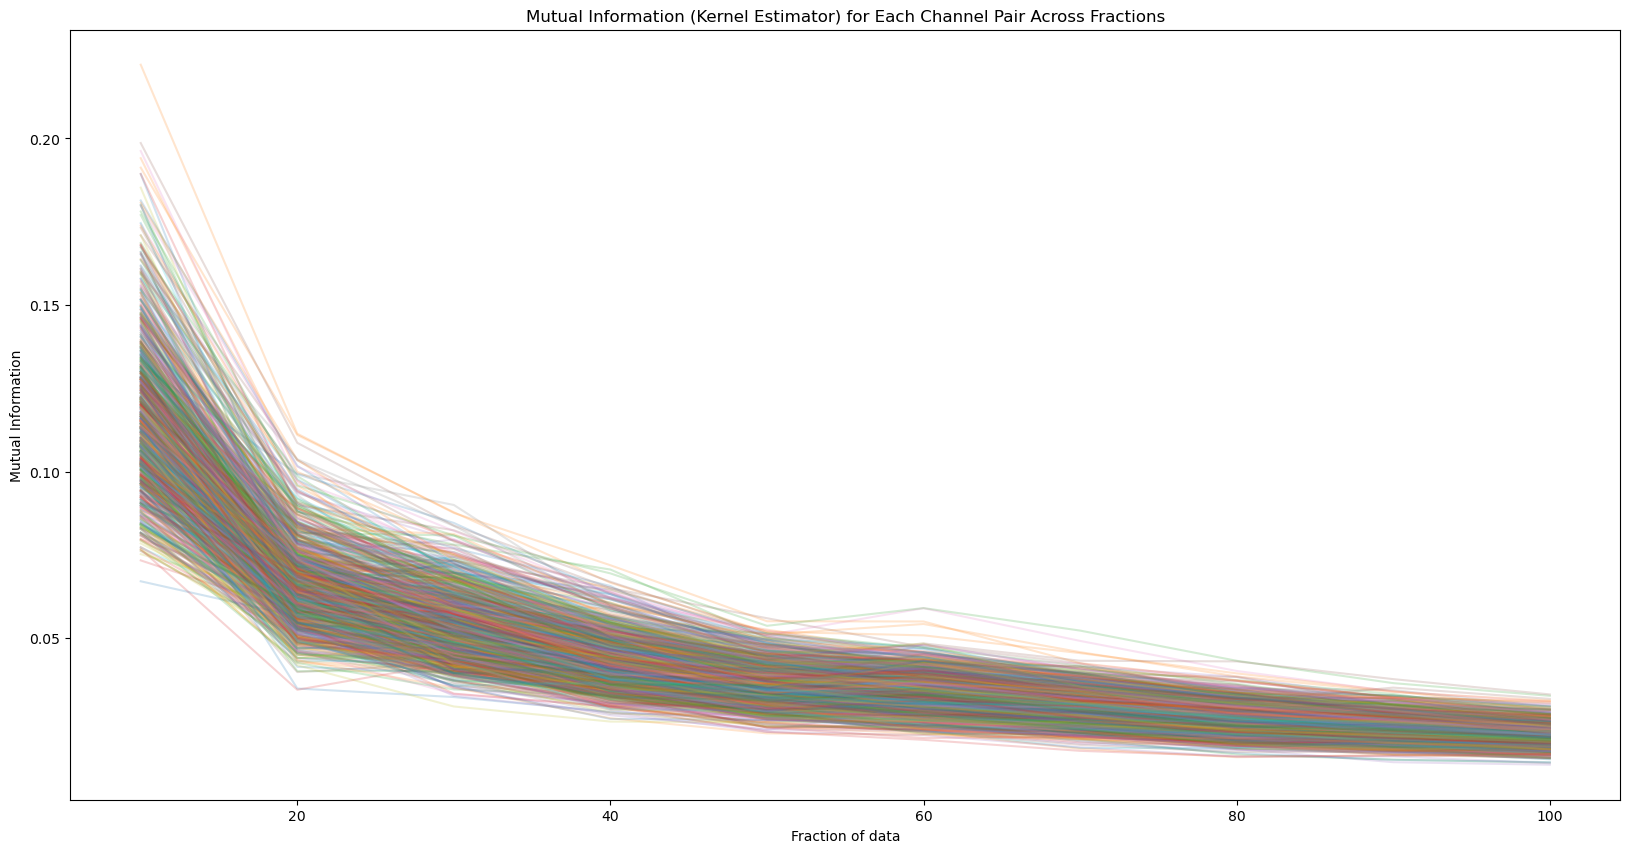

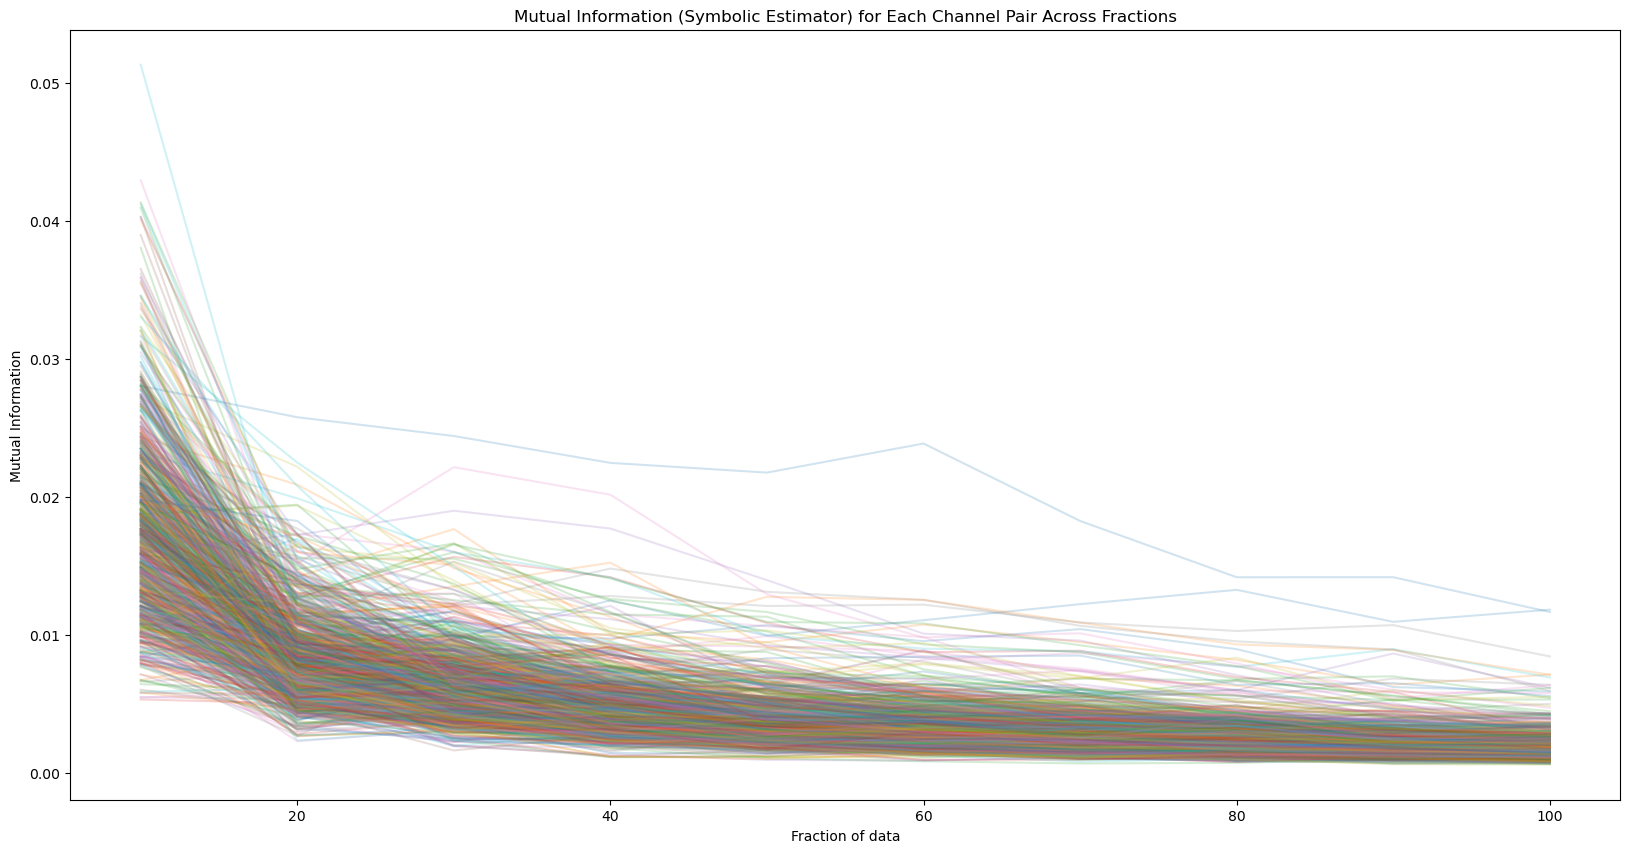

In [4]:
X = data_inter[0].transpose(1, 0, 2).reshape(data_inter[0].shape[1], -1)
Y = data_inter[1].transpose(1, 0, 2).reshape(data_inter[1].shape[1], -1)

fractions = np.arange(10, 110, 10)

# Initialize dictionaries for storing MI values for each estimator
channel_pair_mi_ksg = {}
channel_pair_mi_kernel = {}
channel_pair_mi_symbolic = {}

for fraction in fractions:
    fraction_index = int(fraction * X.shape[1] / 100)
    
    mi_ksg_matrix = compute_mi(X[:, :fraction_index], Y[:, :fraction_index], epoch_avg=True, mode='ksg')
    mi_kernel_matrix = compute_mi(X[:, :fraction_index], Y[:, :fraction_index], epoch_avg=True, mode='kernel')
    mi_symbolic_matrix = compute_mi(X[:, :fraction_index], Y[:, :fraction_index], epoch_avg=True, mode='symbolic')
    
    for i in range(mi_ksg_matrix.shape[0]):
        for j in range(mi_ksg_matrix.shape[1]):
            key = (i, j)
            channel_pair_mi_ksg.setdefault(key, []).append(mi_ksg_matrix[i, j])
    
    for i in range(mi_kernel_matrix.shape[0]):
        for j in range(mi_kernel_matrix.shape[1]):
            key = (i, j)
            channel_pair_mi_kernel.setdefault(key, []).append(mi_kernel_matrix[i, j])
    
    for i in range(mi_symbolic_matrix.shape[0]):
        for j in range(mi_symbolic_matrix.shape[1]):
            key = (i, j)
            channel_pair_mi_symbolic.setdefault(key, []).append(mi_symbolic_matrix[i, j])

def plot_mi(fractions, channel_pair_mi, title):
    plt.figure(figsize=(20, 10))
    for mi in channel_pair_mi.values():
        plt.plot(fractions, mi, alpha=0.2)
    plt.xlabel("Fraction of data")
    plt.ylabel("Mutual Information")
    plt.title(title)
    plt.show()

plot_mi(fractions, channel_pair_mi_ksg, "Mutual Information (KSG Estimator) for Each Channel Pair Across Fractions")
plot_mi(fractions, channel_pair_mi_kernel, "Mutual Information (Kernel Estimator) for Each Channel Pair Across Fractions")
plot_mi(fractions, channel_pair_mi_symbolic, "Mutual Information (Symbolic Estimator) for Each Channel Pair Across Fractions")


In [16]:
X = data_inter[0].transpose(1, 0, 2).reshape(data_inter[0].shape[1], -1) 
Y = data_inter[1].transpose(1, 0, 2).reshape(data_inter[1].shape[1], -1)

plt.figure(figsize=(20, 10))

channel_pair_mis = {}
max_mi_value = 0

fractions = np.arange(10, 110, 10)
for fraction in tqdm(fractions):
    fraction_index = int(fraction * X.shape[1] / 100)
    # Compute MI matrix for the current fraction of data
    mi_matrix = compute_mi(X[:, :fraction_index], Y[:, :fraction_index], is_epoched=False, mode='kernel')
    
    # Iterate through each channel pair and append MI values
    for i in range(mi_matrix.shape[0]):
        for j in range(mi_matrix.shape[1]):
            if (i, j) not in channel_pair_mis:
                channel_pair_mis[(i, j)] = []
            channel_pair_mis[(i, j)].append(mi_matrix[i, j])
            max_mi_value = max(max_mi_value, mi_matrix[i, j])

# Plot MI values for each channel pair
for (i, j), mis in channel_pair_mis.items():
    plt.plot(fractions, mis, alpha=0.2)

plt.xlabel("Fraction of data")
plt.ylabel("Mutual Information")
plt.xlim(10,100)
plt.ylim(0, 0.5) #max_mi_value * 1.1 
plt.show()

 70%|███████   | 7/10 [1:33:59<40:16, 805.66s/it] 


KeyboardInterrupt: 

<Figure size 2000x1000 with 0 Axes>

# SHUTDOWN JVM

In [ ]:
shutdownJVM()

# EMERGENCE

In [ ]:
import emergence
from emergence.utils.jvm import JVM
from emergence.micalc import MutualInfo
from emergence.calc.jidt import JidtCalc

X = np.random.randint(2, size = (1000, 2))
M = np.array([ np.logical_xor(*x) for x in X ], dtype = int)
M[2:] += M[:-2]

est = MutualInfo.get('Discrete')
calc = JidtCalc(X, M, est, pointwise = False, dt = 2)
psi0 = calc.psi(q = 0)
psi1 = calc.psi(q = 1)